# Visualisation demo 
A 2D visualisation of how manuscript pages are laid out. 

In [1]:
from visualisation import * # Import everything we need

This is required to enable widget interactivity. '%matplotlib notebook' might also work. 

In [2]:
%matplotlib widget

Load in all the relevant data here (a sample of pages from 5 Medieval Christian and Islamic mansucripts).

In [3]:
image_size = 500

transform = transforms.Compose([transforms.Resize(image_size),
                                transforms.CenterCrop(image_size-1),
                                transforms.ToTensor()])
manuscript_dataset = datasets.ImageFolder('../data/images/', transform=transform)
manuscript_label_to_name =  {value:key for key, value in manuscript_dataset.class_to_idx.items()}

manuscript_dataloader = torch.utils.data.DataLoader(manuscript_dataset, batch_size=128, shuffle=False)

image_batch, label_batch = next(iter(manuscript_dataloader))

page_numbers = [name[0].split(".")[-2].split("-")[-1] for name in manuscript_dataset.imgs]

# precalculated embeddings
manuscript_vectors = np.load('numpy/vectors.npy')
manuscript_labels = np.load('numpy/labels.npy')

# Dataframe grouping everything together
manuscript_dataframe = pd.DataFrame({'vector': [x for x in manuscript_vectors], 'label': manuscript_labels})
manuscript_dataframe['manuscript'] = [manuscript_label_to_name[label] for label in manuscript_dataframe['label']]
manuscript_dataframe["page"] = page_numbers
# Group by manuscript
manuscript_groups = manuscript_dataframe.groupby(by='manuscript')

In [4]:
x,y = projection(manuscript_vectors,method="umap")
cluster_model = cluster(x,y,method="Gaussian mixture",min_clusters=5)

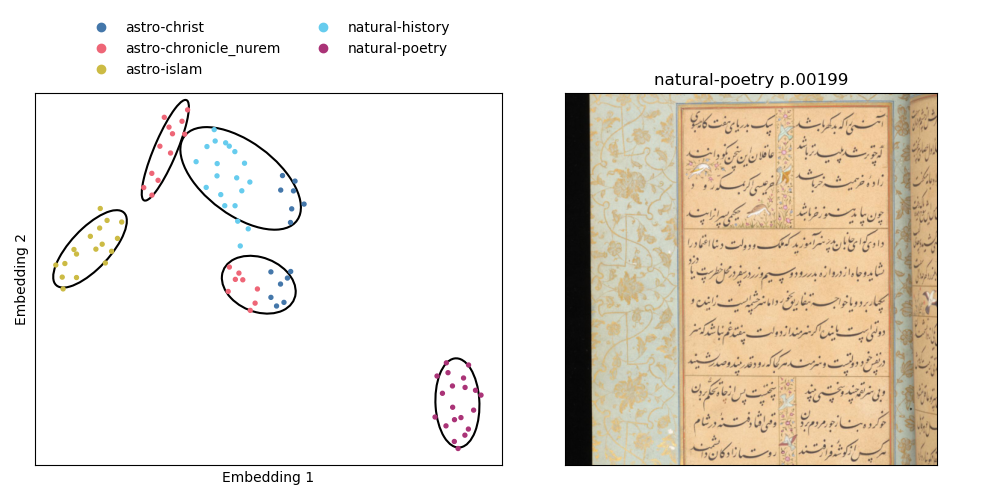

(<Figure size 1000x500 with 2 Axes>,
 (<AxesSubplot:xlabel='Embedding 1', ylabel='Embedding 2'>,
  <AxesSubplot:title={'center':'natural-poetry p.00199'}>,
  None))

In [5]:
display_visualisation(x,y,image_batch,manuscript_dataframe,cluster_model,
                        prototype_fts=False)